# complex ode system


# Dynamic Plug Flow Reactor (PFR) in Python

## Problem Description

In a Plug Flow Reactor (PFR), the concentration of the reactant changes over time and along the length of the reactor. For a first-order reaction \( A -> B \) with rate constant \( k \), we derive the concentration profile as a function of both time and reactor length.

### Equations

The PDE for a first-order reaction in a PFR is:

$$
\frac{\partial C_A}{\partial t} + u \frac{\partial C_A}{\partial x} = -k C_A
$$

where:
- \( C_A \) is the concentration of \( A \),
- \( t \) is time,
- \( x \) is the position along the reactor length,
- \( u \) is the flow velocity,
- \( k \) is the reaction rate constant.




### Example Usage

This example sets the initial concentration to 1 mol/L, flow velocity to 1 m/min, rate constant to 0.1 1/min, reactor length to 10 m, and solves for 100 time points over 5 minutes. The output shows the concentration profile of \( A \) along the length of the reactor at different time points.



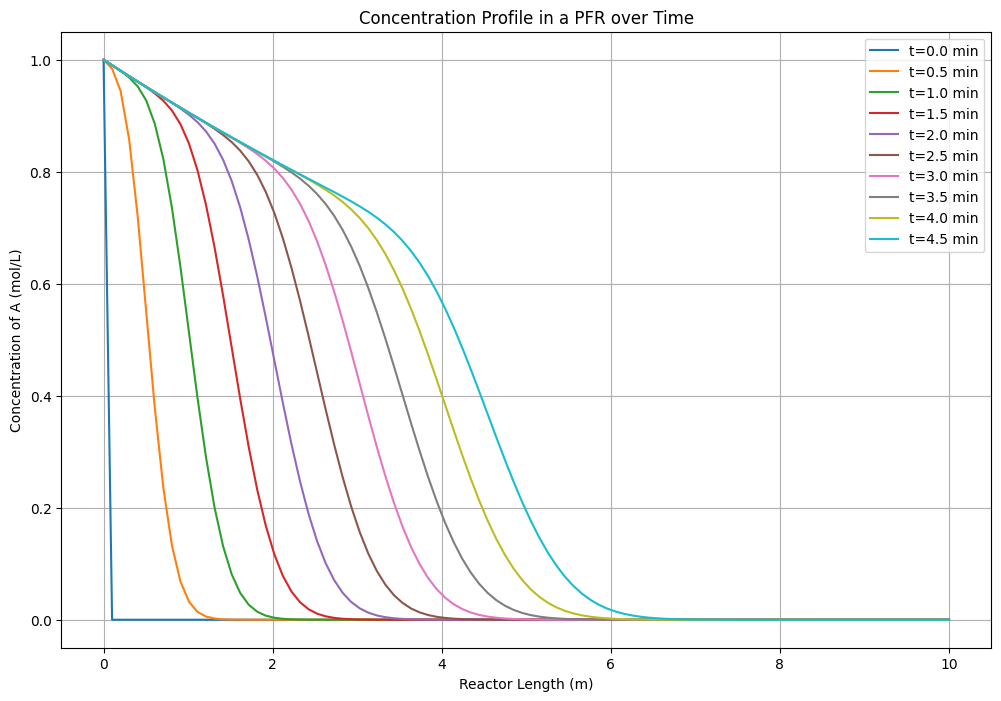

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfr_model(CA, t, u, k, dx):
    """
    Defines the differential equations for the PFR model.

    Parameters:
    CA (array): Array of concentrations along the reactor length.
    t (float): Time variable.
    u (float): Flow velocity (m/min).
    k (float): Reaction rate constant (1/min).
    dx (float): Spatial step size (m).

    Returns:
    dCAdt (array): Array of time derivatives of concentrations.
    """
    dCAdt = np.zeros_like(CA)
    dCAdt[0] = 0  # Boundary condition at x=0, no inflow change

    # Apply the PDE discretization for the interior points
    for i in range(1, len(CA)):
        dCAdt[i] = -u * (CA[i] - CA[i-1]) / dx - k * CA[i]
    
    return dCAdt

# Parameters
CA0 = 1.0  # mol/L, initial concentration
u = 1.0    # m/min, flow velocity
k = 0.1    # 1/min, rate constant
L = 10.0   # m, length of the reactor
Nx = 100   # Number of spatial steps
dx = L / Nx  # Spatial step size
t = np.linspace(0, 5, 100)  # Time points (min)

# Initial concentration profile (all zero except inlet)
CA_initial = np.zeros(Nx)
CA_initial[0] = CA0

# Solve the PDE using the method of lines
CA_profile = odeint(pfr_model, CA_initial, t, args=(u, k, dx))

# Plotting the concentration profiles at different times
plt.figure(figsize=(12, 8))

for i in range(0, len(t), 10):  # Plot every 10th time point
    plt.plot(np.linspace(0, L, Nx), CA_profile[i], label=f't={t[i]:.1f} min')

plt.title('Concentration Profile in a PFR over Time')
plt.xlabel('Reactor Length (m)')
plt.ylabel('Concentration of A (mol/L)')
plt.legend()
plt.grid(True)
plt.show()


# Plug Flow Reactor (PFR) with recycle

Plug Flow Reactor (PFR) with recycle, we need to consider a dynamic scenario where the concentration of the reactant changes over time at different positions along the reactor length, taking into account the recycle stream. This involves solving partial differential equations (PDEs) along with accounting for the recycle flow.

The PDE for a first-order reaction \( A \rightarrow B \) in a PFR with recycle is given by:

$$
\frac{\partial C_A}{\partial t} + u \frac{\partial C_A}{\partial x} = -k C_A + \frac{R F_r}{F} (C_{A_{in}} - C_A)
$$

where:
- \( C_A \) is the concentration of \( A \),
- \( t \) is time,
- \( x \) is the position along the reactor length,
- \( u \) is the flow velocity,
- \( k \) is the reaction rate constant,
- \( R \) is the recycle ratio (\( 0 \leq R \leq 1 \)),
- \( F_r \) is the recycle flow rate,
- \( F \) is the total flow rate,
- \( C_{A_{in}} \) is the concentration of \( A \) in the inlet stream to the reactor.



1. **Model Definition**: The `pfr_model_with_recycle` function defines the differential equations for the PFR model with recycle using the method of lines. It computes the time derivatives of concentrations at each spatial point, considering the recycle flow.
2. **Parameters**: Initial concentration \( CA0 \), flow velocity \( u \), rate constant \( k \), reactor length \( L \), number of spatial steps \( Nx \), time points \( t \), recycle ratio \( R \), total flow rate \( F \), and inlet concentration \( CA_{in} \

).
3. **Initial Concentration Profile**: Set the initial concentration profile with the inlet concentration \( CA0 \) at the first spatial point.


### Example Usage

This example sets the initial concentration to 1 mol/L, flow velocity to 1 m/min, rate constant to 0.1 1/min, reactor length to 10 m, recycle ratio to 0.5, total flow rate to 10 L/min, and inlet concentration to 2 mol/L. The output shows the concentration profile of \( A \) along the length of the reactor at different time points with recycle.



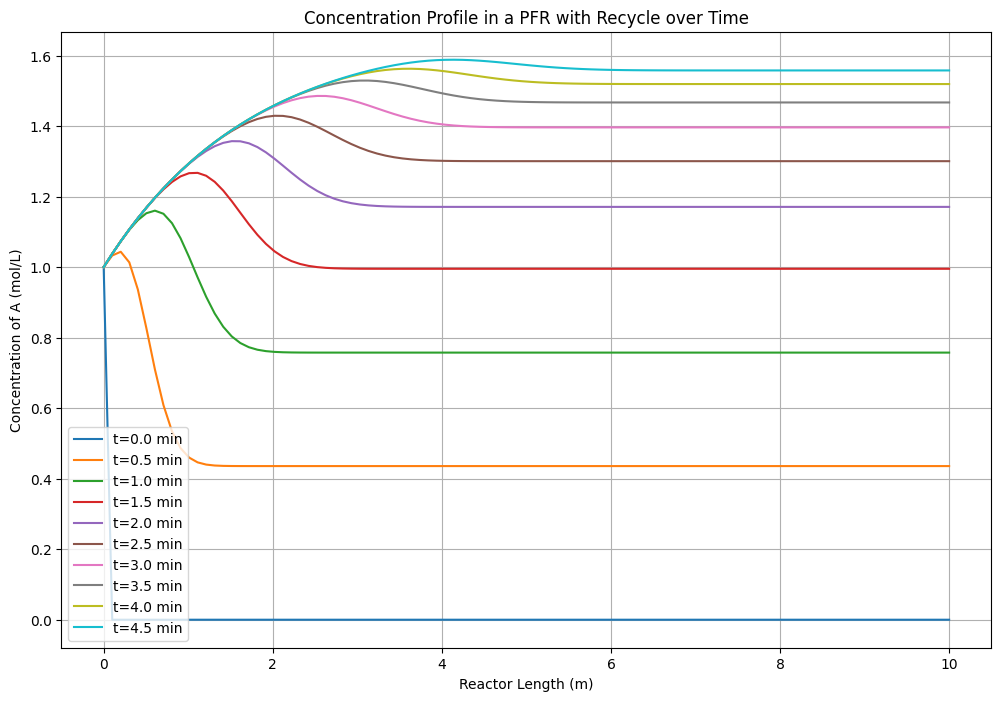

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfr_model_with_recycle(CA, t, u, k, dx, R, CA_in):
    """
    Defines the differential equations for the PFR model with recycle.

    Parameters:
    CA (array): Array of concentrations along the reactor length.
    t (float): Time variable.
    u (float): Flow velocity (m/min).
    k (float): Reaction rate constant (1/min).
    dx (float): Spatial step size (m).
    R (float): Recycle ratio.
    CA_in (float): Inlet concentration (mol/L).

    Returns:
    dCAdt (array): Array of time derivatives of concentrations.
    """
    dCAdt = np.zeros_like(CA)
    dCAdt[0] = 0  # Boundary condition at x=0, no inflow change

    # Apply the PDE discretization for the interior points
    for i in range(1, len(CA)):
        dCAdt[i] = -u * (CA[i] - CA[i-1]) / dx - k * CA[i] + R * CA_in - R * CA[i]
    
    return dCAdt

# Parameters
CA0 = 1.0  # mol/L, initial concentration
u = 1.0    # m/min, flow velocity
k = 0.1    # 1/min, rate constant
L = 10.0   # m, length of the reactor
Nx = 100   # Number of spatial steps
dx = L / Nx  # Spatial step size
t = np.linspace(0, 5, 100)  # Time points (min)
R = 0.5    # Recycle ratio
F = 10.0   # L/min, total flow rate
CA_in = 2.0  # mol/L, inlet concentration

# Initial concentration profile (all zero except inlet)
CA_initial = np.zeros(Nx)
CA_initial[0] = CA0

# Solve the PDE using the method of lines
CA_profile = odeint(pfr_model_with_recycle, CA_initial, t, args=(u, k, dx, R, CA_in))

# Plotting the concentration profiles at different times
plt.figure(figsize=(12, 8))

for i in range(0, len(t), 10):  # Plot every 10th time point
    plt.plot(np.linspace(0, L, Nx), CA_profile[i], label=f't={t[i]:.1f} min')

plt.title('Concentration Profile in a PFR with Recycle over Time')
plt.xlabel('Reactor Length (m)')
plt.ylabel('Concentration of A (mol/L)')
plt.legend()
plt.grid(True)
plt.show()


# for the reaction \( A -> 2B + C \) PFR





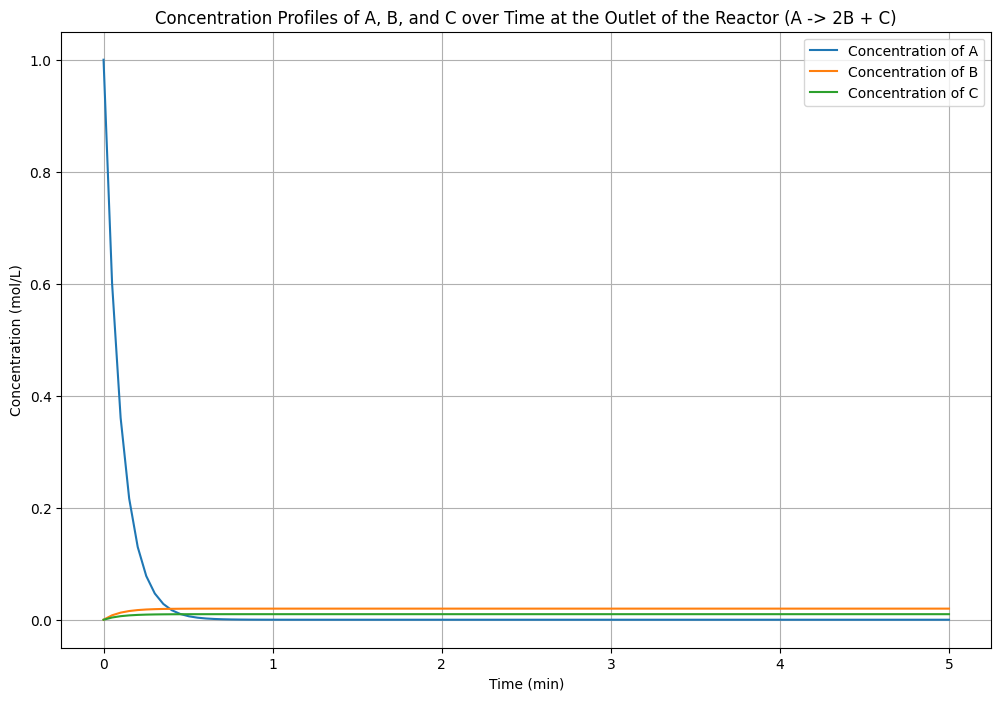

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfr_model_with_recycle_ABC(C, t, u, k, dx, R):
    """
    Defines the differential equations for the PFR model with recycle for A -> 2B + C.

    Parameters:
    C (array): Array of concentrations along the reactor length.
    t (float): Time variable.
    u (float): Flow velocity (m/min).
    k (float): Reaction rate constant (1/min).
    dx (float): Spatial step size (m).
    R (float): Recycle ratio.

    Returns:
    dCdt (array): Array of time derivatives of concentrations.
    """
    CA, CB, CC = C  # Concentrations of A, B, and C

    # Differential equations
    dCAdt = -u * CA / dx - k * CA
    dCBdt = 2 * k * CA
    dCCdt = k * CA

    return [dCAdt, dCBdt, dCCdt]

# Parameters
CA0 = 1.0    # mol/L, initial concentration of A
CB0 = 0.0    # mol/L, initial concentration of B
CC0 = 0.0    # mol/L, initial concentration of C
u = 1.0      # m/min, flow velocity
k = 0.1      # 1/min, rate constant
L = 10.0     # m, length of the reactor
Nx = 100     # Number of spatial steps
dx = L / Nx  # Spatial step size
t = np.linspace(0, 5, 100)  # Time points (min)
R = 0.5      # Recycle ratio

# Initial concentration profile (all zero except inlet)
C_initial = [CA0, CB0, CC0]

# Solve the PDE using the method of lines
C_profile = odeint(pfr_model_with_recycle_ABC, C_initial, t, args=(u, k, dx, R))

# Plotting the concentration profiles of A, B, and C over time at the outlet of the reactor
plt.figure(figsize=(12, 8))

plt.plot(t, C_profile[:, 0], label='Concentration of A')
plt.plot(t, C_profile[:, 1], label='Concentration of B')
plt.plot(t, C_profile[:, 2], label='Concentration of C')

plt.title('Concentration Profiles of A, B, and C over Time at the Outlet of the Reactor (A -> 2B + C)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol/L)')
plt.legend()
plt.grid(True)
plt.show()


# A -> B + C

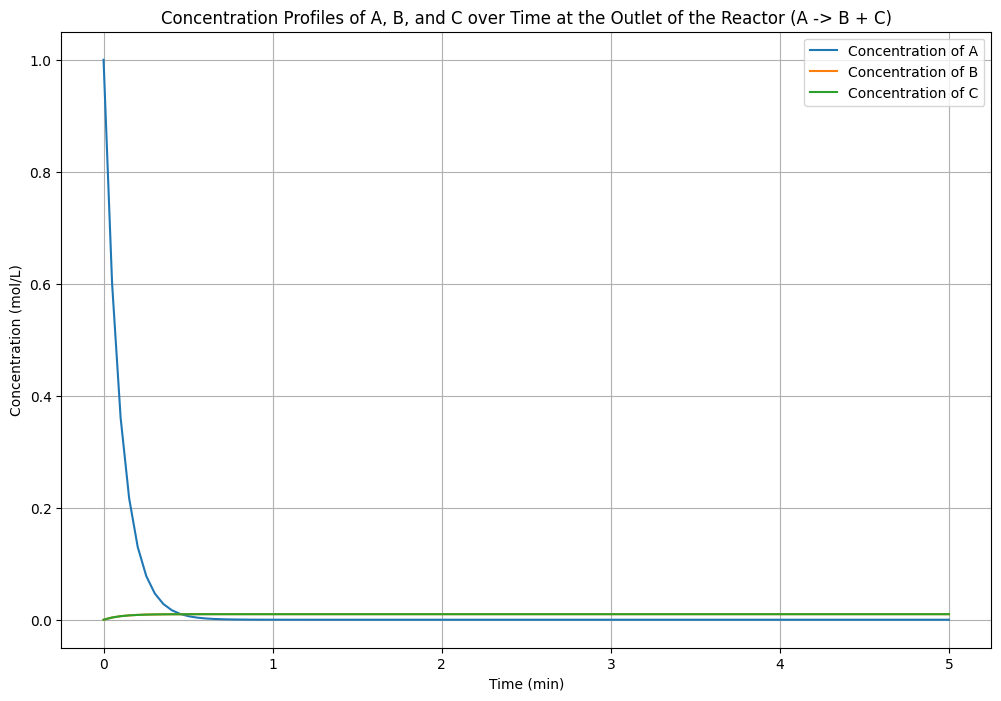

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pfr_model_with_recycle_BC(C, t, u, k, dx, R, CA0):
    """
    Defines the differential equations for the PFR model with recycle for A -> B + C.

    Parameters:
    C (array): Array of concentrations along the reactor length.
    t (float): Time variable.
    u (float): Flow velocity (m/min).
    k (float): Reaction rate constant (1/min).
    dx (float): Spatial step size (m).
    R (float): Recycle ratio.
    CA0 (float): Initial concentration of A (mol/L).

    Returns:
    dCdt (array): Array of time derivatives of concentrations.
    """
    CA, CB, CC = C  # Concentrations of A, B, and C

    # Differential equations
    dCAdt = -u * CA / dx - k * CA
    dCBdt = k * CA
    dCCdt = k * CA

    return [dCAdt, dCBdt, dCCdt]

# Parameters
CA0 = 1.0    # mol/L, initial concentration of A
CB0 = 0.0    # mol/L, initial concentration of B
CC0 = 0.0    # mol/L, initial concentration of C
u = 1.0      # m/min, flow velocity
k = 0.1      # 1/min, rate constant
L = 10.0     # m, length of the reactor
Nx = 100     # Number of spatial steps
dx = L / Nx  # Spatial step size
t = np.linspace(0, 5, 100)  # Time points (min)
R = 0.5      # Recycle ratio

# Initial concentration profile (all zero except inlet)
C_initial = [CA0, CB0, CC0]

# Solve the PDE using the method of lines
C_profile = odeint(pfr_model_with_recycle_BC, C_initial, t, args=(u, k, dx, R, CA0))

# Plotting the concentration profiles of A, B, and C over time at the outlet of the reactor
plt.figure(figsize=(12, 8))

plt.plot(t, C_profile[:, 0], label='Concentration of A')
plt.plot(t, C_profile[:, 1], label='Concentration of B')
plt.plot(t, C_profile[:, 2], label='Concentration of C')

plt.title('Concentration Profiles of A, B, and C over Time at the Outlet of the Reactor (A -> B + C)')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mol/L)')
plt.legend()
plt.grid(True)
plt.show()


# simple pfr

**Problem Formulation**

* Reaction: A -> B
* Rate Law: A = -kCA [1]
* Mass Balance: dCA/dt = -kCA [2]

where:
  * k is the reaction rate constant
  * CA is the concentration of A
  * t is time

The residence time (T) in the reactor is defined as the volume of the reactor (Vi) divided by the volumetric flow rate (Q). 

**Numerical Solution**

The text describes using the odeint function from the scipy.integrate library to solve the ordinary differential equation (ODE) over time. [1] Rate law: This is the expression that shows how the rate of the reaction is affected by the concentrations of the reactants. In this case, the rate of the reaction is proportional to the concentration of A (CA) to the power of one, and the proportionality constant is k. [2] Mass balance: This is the equation that describes how the concentration of A changes over time. The left-hand side of the equation represents the rate of change of CA, which is denoted by dCA/dt. The right-hand side of the equation represents the rate law, which is -kCA.


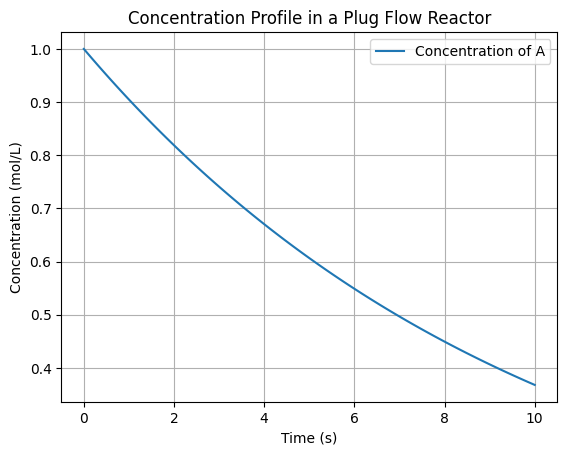

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the rate constant and initial conditions
k = 0.1  # rate constant in s^-1
C_A0 = 1.0  # initial concentration of A in mol/L
Q = 1.0  # volumetric flow rate in L/s
V = 10.0  # reactor volume in L

# Residence time
tau = V / Q

# Define the time points where we want to solve the ODE
t = np.linspace(0, tau, 100)  # time from 0 to residence time

# Define the PFR model with respect to time
def pfr_model(C_A, t):
    dCAdt = -k * C_A
    return dCAdt

# Solve the ODE
C_A = odeint(pfr_model, C_A0, t)

# Plot the concentration profile
plt.plot(t, C_A, label='Concentration of A')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Concentration Profile in a Plug Flow Reactor')
plt.legend()
plt.grid(True)
plt.show()


### Plug Flow Reactor (PFR) Description

In a Plug Flow Reactor (PFR), the reactant concentration changes continuously along the length of the reactor. For a first-order reaction \( A -> B \) with rate constant \( k \), we derive the concentration profile along the reactor.

### Problem Description

For a PFR, the differential form of the material balance equation is:

$$
\frac{dC_A}{dV} = -k C_A
$$

where:
- \( C_A \) is the concentration of \( A \),
- \( V \) is the reactor volume,
- \( k \) is the reaction rate constant.

We can rewrite this in terms of reactor length \( L \) and flow rate \( F \):

$$
\frac{dC_A}{dL} = -\frac{k C_A}{F}
$$

### Solution

To solve this, we integrate the equation:

$$
\int_{C_{A0}}^{C_A} \frac{dC_A}{C_A} = -\int_0^L \frac{k}{F} dL
$$

Which simplifies to:

$$
\ln\left(\frac{C_A}{C_{A0}}\right) = -\frac{kL}{F}
$$

Therefore, the concentration profile along the length of the reactor is:

$$
C_A = C_{A0} \exp\left(-\frac{kL}{F}\right)
$$



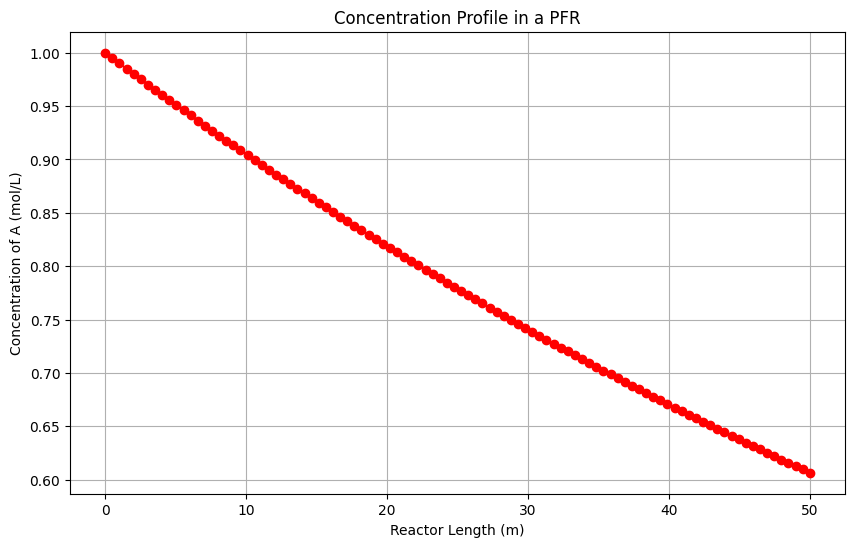

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def pfr_concentration(CA0, k, F, L):
    """
    Calculate the concentration of A along the length of a PFR.

    Parameters:
    CA0 (float): Initial concentration of A (mol/L).
    k (float): Reaction rate constant (1/min).
    F (float): Flow rate (L/min).
    L (float): Length of the reactor (m).

    Returns:
    np.ndarray: Concentrations of A along the reactor length.
    np.ndarray: Reactor length values.
    """
    # Generate length values from 0 to L
    length_values = np.linspace(0, L, 100)
    
    # Calculate concentration profile
    concentration_values = CA0 * np.exp(-k * length_values / F)
    
    return concentration_values, length_values

# Example usage and plotting
CA0 = 1.0  # mol/L, initial concentration
k = 0.1    # 1/min, rate constant
F = 10.0   # L/min, flow rate
L = 50.0   # m, length of the reactor

concentration_values, length_values = pfr_concentration(CA0, k, F, L)

# Plotting the concentration profile
plt.figure(figsize=(10, 6))
plt.plot(length_values, concentration_values, marker='o', linestyle='-', color='r')
plt.title('Concentration Profile in a PFR')
plt.xlabel('Reactor Length (m)')
plt.ylabel('Concentration of A (mol/L)')
plt.grid(True)
plt.show()